<a href="https://colab.research.google.com/github/williamokomba/AICE-Artificial-Intelligence-Diploma/blob/main/Final_project_Stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## USA APPLE INC STOCK MARKET PREDICTION

In [1]:
#installing the required packages

#Upgrade pandas
#!pip3 install --upgrade pandas

#Install pandas datareader
#!pip install pandas-datareader

### **1. Collecting the stock data (AAPL)**

In [2]:
#Data collection
import pandas_datareader as pdr

In [3]:
#Assigning the dataset key to a variable key
key= "2bc19e895a60ab8aecc6d8d450d5090e5f8dad79"

In [4]:
#Data collection
data = pdr.get_data_tiingo("AAPL", api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [5]:
#saving data to csv
data.to_csv("AAPL.csv")

In [6]:
#Importing libraries
import pandas as pd


In [7]:
#lading and reading the dataset
data1=pd.read_csv("/content/AAPL.csv")

In [8]:
#checking first 5 rows
data1.head(3)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-03-20 00:00:00+00:00,141.46,141.5,140.23,140.400,21542038,33.385101,33.394541,33.094817,33.134937,86168152,0.0,1.0
1,AAPL,2017-03-21 00:00:00+00:00,139.84,142.8,139.73,142.110,39529912,33.002775,33.701346,32.976815,33.538504,158119648,0.0,1.0
2,AAPL,2017-03-22 00:00:00+00:00,141.42,141.6,139.76,139.845,25860165,33.375661,33.418142,32.983895,33.003955,103440660,0.0,1.0


In [10]:
#checking the tail
data1.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2022-03-11 00:00:00+00:00,154.73,159.28,154.50,158.93,96970102,154.73,159.28,154.50,158.93,96970102,0.0,1.0
1255,AAPL,2022-03-14 00:00:00+00:00,150.62,154.12,150.10,151.45,108732111,150.62,154.12,150.10,151.45,108732111,0.0,1.0
1256,AAPL,2022-03-15 00:00:00+00:00,155.09,155.57,150.38,150.90,92964302,155.09,155.57,150.38,150.90,92964302,0.0,1.0
1257,AAPL,2022-03-16 00:00:00+00:00,159.59,160.00,154.46,157.05,102300157,159.59,160.00,154.46,157.05,102300157,0.0,1.0
1258,AAPL,2022-03-17 00:00:00+00:00,160.62,161.00,157.63,158.61,75615376,160.62,161.00,157.63,158.61,75615376,0.0,1.0


In [11]:
#cheking the shape
data1.shape

(1259, 14)

In [12]:
#checking the datatype
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1259 non-null   object 
 1   date         1259 non-null   object 
 2   close        1259 non-null   float64
 3   high         1259 non-null   float64
 4   low          1259 non-null   float64
 5   open         1259 non-null   float64
 6   volume       1259 non-null   int64  
 7   adjClose     1259 non-null   float64
 8   adjHigh      1259 non-null   float64
 9   adjLow       1259 non-null   float64
 10  adjOpen      1259 non-null   float64
 11  adjVolume    1259 non-null   int64  
 12  divCash      1259 non-null   float64
 13  splitFactor  1259 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.8+ KB


In [13]:
#stock prediction using closing price
data2=data1.reset_index()["close"]
data2.shape

(1259,)

In [14]:
#checking data2
data2

0       141.46
1       139.84
2       141.42
3       140.92
4       140.64
         ...  
1254    154.73
1255    150.62
1256    155.09
1257    159.59
1258    160.62
Name: close, Length: 1259, dtype: float64

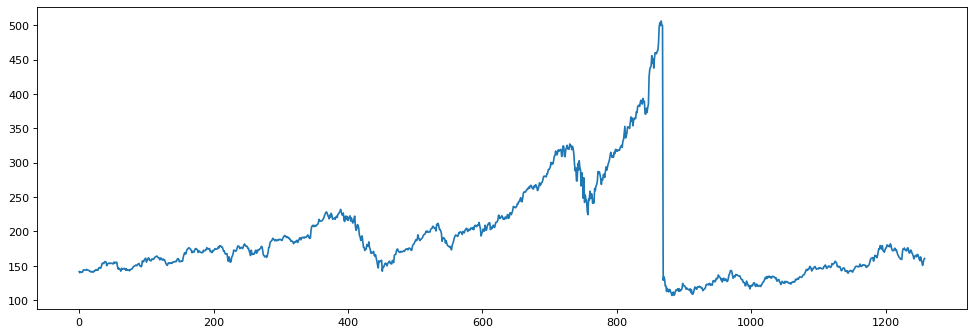

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 5), dpi=80)
plt.plot(data2);

### **2. Preocessing the Data- Train and Test data**

LSTM are sensitive to the scale of the date. so we apply MinMax scaler


In [16]:
#import numpy library 
import numpy as np

In [17]:
#imprting MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [18]:
#scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
data2=scaler.fit_transform(np.array(data2).reshape(-1,1))

In [19]:
data2.shape

(1259, 1)

In regression/classification we devide data into train and test data using random seed or cross validation.

However, in time series the current value depend on previous values(sequence data). In this case we can split based on dates

In [20]:
#splitting dataset into train and test split

training_size= int(len(data2)*0.65)
test_size = len(data)- training_size
train_data, test_data= data2[0:training_size, :], data2[training_size:len(data2),:1]

In [21]:
#checking the size
training_size, test_size

(818, 441)

In [22]:
import numpy
#Data preprocessing
# inroducing the time stamp
#convert an array of values into  a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset [i:(i+time_step), 0] ## i =0,1,2,3----99    
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [23]:
#Reshape into X=t, t+1, t+3, and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [24]:
#checking Xtrain 
print(X_train)

[[0.08671259 0.08265498 0.0866124  ... 0.13016907 0.13335003 0.13580463]
 [0.08265498 0.0866124  0.08536005 ... 0.13335003 0.13580463 0.12142768]
 [0.0866124  0.08536005 0.08465874 ... 0.13580463 0.12142768 0.12683782]
 ...
 [0.52530996 0.52814026 0.53197245 ... 0.59398873 0.61615529 0.57372574]
 [0.52814026 0.53197245 0.52966813 ... 0.61615529 0.57372574 0.58098936]
 [0.53197245 0.52966813 0.50622417 ... 0.57372574 0.58098936 0.59148403]]


In [25]:
#checking train data
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [26]:
#checking test data
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [27]:
#reshape input to be [sample, time_step, features] which is required by LSTM (3D array....use of 1)

X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], 1) 
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

### **3. Creating stacked LSTM model**

In [28]:
#installing tensorflow
#!pip install tensorflow
#
#importing the keras library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM


In [29]:
#checking tensorflow version
tf.__version__

'2.8.0'

In [30]:
#create stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 204ms/step - loss: 0.0152 - val_loss: 0.0012
Epoch 2/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 3/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0017 - val_loss: 7.7419e-04
Epoch 4/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0011 - val_loss: 2.6045e-04
Epoch 5/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0011 - val_loss: 3.1634e-04
Epoch 6/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0010 - val_loss: 2.9158e-04
Epoch 7/100
12/12 [==============================] - 1s 85ms/step - loss: 9.0445e-04 - val_loss: 2.9580e-04
Epoch 8/100
12/12 [==============================] - 1s 85ms/step - loss: 8.6838e-04 - val_loss: 3.1417e-04
Epoch 9/100
12/12 [==============================] - 1s 85ms/step - loss: 8.3303e-04 - val_loss: 2.2731e-04
Epoch 10/100
12/12 [==============================] - 1s 8

### **4. Predict the test data and plot the output**

In [33]:
#predicting and checking the performance metrics

train_predict= model.predict(X_train)
test_predict= model.predict(X_test)



In [34]:
#transform back to original form

train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [35]:
## Calculating the RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

213.9571802402619

In [36]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

144.56228273019667

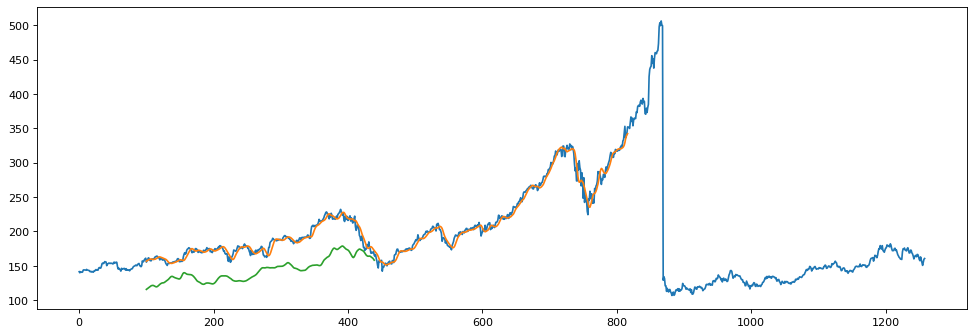

In [37]:
# plotting
#shift train prediction for plotting
look_back =100
train_predictplot = numpy.empty_like(data2)
train_predictplot[:, :] = np.nan
train_predictplot[look_back:len(train_predict) + look_back, :] = train_predict
#shift test predict for plotting
test_predictplot = numpy.empty_like(data2)
test_predictplot[:, :] = np.nan
test_predictplot[look_back:len(test_predict) + look_back, :] = test_predict

#plot baseline and prediction
figure(figsize=(15, 5), dpi=80)
plt.plot(scaler.inverse_transform(data2))
plt.plot(train_predictplot)
plt.plot(test_predictplot);


Observation: blue is the all the dataset
green is the training dataset

yellow is the test dataset


### **5. Predicting the future 30 days and plotting the output**

In [38]:
#checking the shape of the test data
len(test_data)

441

To predict 10 days, we will take 100 data from the previus data_test_data. therefore the test data will remain with 341 data(441-100)

In [39]:
#creating the data to use
x_input= test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
#converting the above into a list
temp_input= list(x_input)
temp_list=temp_input[0].tolist()

#checking the 100 value
temp_input

[array([0.10469631, 0.1063995 , 0.10522229, 0.11453976, 0.10760175,
        0.10549781, 0.10815279, 0.11183469, 0.1105072 , 0.1113087 ,
        0.10920476, 0.1101315 , 0.10289292, 0.10276769, 0.10807765,
        0.10810269, 0.11060739, 0.11684408, 0.12781465, 0.13452724,
        0.13570445, 0.13668128, 0.13800877, 0.12515967, 0.13375078,
        0.14642455, 0.14509706, 0.14256731, 0.1377583 , 0.14647464,
        0.16115216, 0.17092048, 0.16961803, 0.181866  , 0.17257358,
        0.16904195, 0.18149029, 0.16385723, 0.16105197, 0.15757044,
        0.16568566, 0.17232311, 0.17392611, 0.18407013, 0.18146525,
        0.18169067, 0.17873513, 0.17715717, 0.18827802, 0.18249217,
        0.17051972, 0.16320601, 0.16363181, 0.1636819 , 0.17092048,
        0.17204759, 0.1636819 , 0.16588604, 0.15769568, 0.14875391,
        0.14444584, 0.13918597, 0.13720726, 0.13259862, 0.1323732 ,
        0.13119599, 0.15902317, 0.17016907, 0.16974327, 0.17282405,
        0.16546024, 0.16418284, 0.16235441, 0.17

In [41]:
#creating an argument with conditions

#predicting next 10 days
from numpy import array

lst_output =[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input= np.array(temp_input[1:])
        print("{} day output {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps, 1))
        #print(X_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[i:]
        #print (temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)




[0.12594438]
2
[0.12594438]
3
[0.12594438]
4
[0.12594438]
5
[0.12594438]
6
[0.12594438]
7
[0.12594438]
8
[0.12594438]
9
[0.12594438]
10
[0.12594438]
11
[0.12594438]
12
[0.12594438]
13
[0.12594438]
14
[0.12594438]
15
[0.12594438]
16
[0.12594438]
17
[0.12594438]
18
[0.12594438]
19
[0.12594438]
20
[0.12594438]
21
[0.12594438]
22
[0.12594438]
23
[0.12594438]
24
[0.12594438]
25
[0.12594438]
26
[0.12594438]
27
[0.12594438]
28
[0.12594438]
29
[0.12594438]
30
[0.12594438]
31
[[0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213], [0.1259443759918213],

In [42]:
day_new=np.arange(1,101)## for step
day_pred=np.arange(100,130)# for 30 days

In [43]:
#checking the prvious data
len(data2)

1259

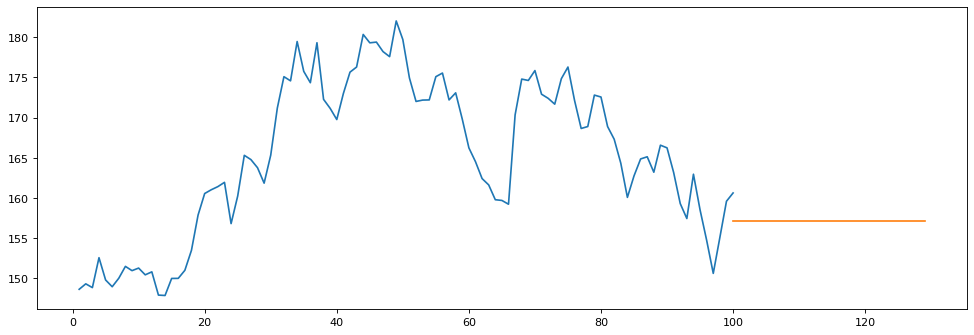

In [44]:
#plotting
figure(figsize=(15, 5), dpi=80)
plt.plot(day_new, scaler.inverse_transform(data2[1159:]))# this is the value of data2-100(1259-100)
plt.plot(day_pred, scaler.inverse_transform(lst_output));

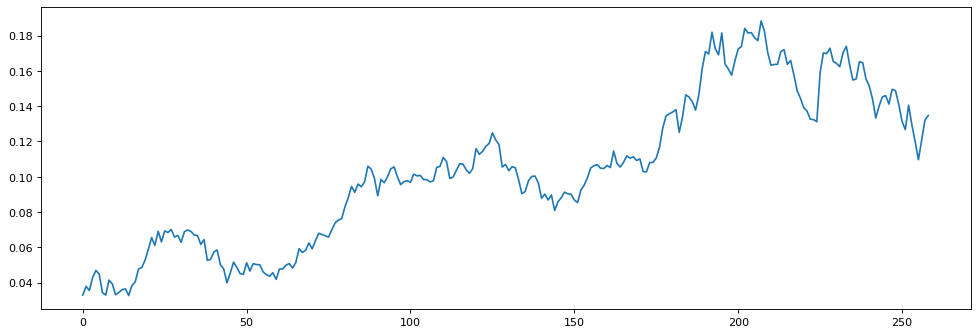

In [45]:
figure(figsize=(15, 5), dpi=80)
plt.plot(data2[1000:]);

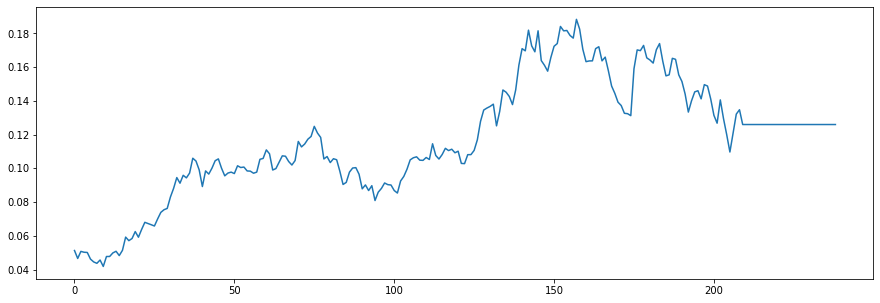

In [46]:
figure(figsize=(15, 5))
data3= data2.tolist()
data3.extend(lst_output)
plt.plot(data3[1050:]);